# Feature Selection and Dimensionality Reduction
According to [wikipedia](https://en.wikipedia.org/wiki/Feature_selection), "feature selection is the process of selecting a subset of relevent features for use in model construction".  In normal circumstances, domain knowledge plays an important role.  Unfortunately, here in the Don't Overfit II competition, we have a binary target and 300 continuous variables "of mysterious origin" which forces us to try automatic feature selection techniques.

In this kernel we will explore the following feature selection and dimensionality reduction techniques:

1. Remove features with missing values
2. Remove features with low variance
3. Remove highly correlated features
4. Univariate feature selection
5. Recursive feature elimination
6. Feature selection using SelectFromModel
7. PCA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

train.head()

Train Shape:  (250, 302)
Test Shape:  (19750, 301)


,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


While logistic regression is clearly the superior model, we can see that both modesl are likely overfitting from the fluctuating cross validation scores.  We can apply feature selection techniques to improve model performance.

## 1.  Remove features with missing values
This one is pretty self explanatory.  First we check for missing values and then can remove columns exceeding a threshold we define.

In [4]:
# check missing values
train.isnull().any().any()

False

The dataset has no missing values and therefore no features to remove at this step.

## 2.  Remove features with low variance
In sklearn's feature selection module we find VarianceThreshold.  It removes all features whose variance doesn't meet some threshold.  By default it removes features with zero variance or features that have the same value for all samples.


In [5]:
from sklearn import feature_selection

sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(train)
train_variance.shape

(250, 302)

The competition description stated that our features are all continuous.  We can see from above there are no features with the same value in all columns, so we have no features to remove here.  We can revisit this technique later and consider removing features with low variance later.

## 3.  Remove highly correlated features

Features that are highly correlated or colinear can cause overfitting.  Here we will explore correlations among features.

In [6]:
# find correlations to target
corr_matrix = train.corr().abs()

print(corr_matrix['target'].sort_values(ascending=False).head(10))

target    1.000000
127       0.337540
176       0.217100
18        0.206452
59        0.203166
135       0.179960
16        0.179796
241       0.173879
126       0.167064
69        0.164571
Name: target, dtype: float64


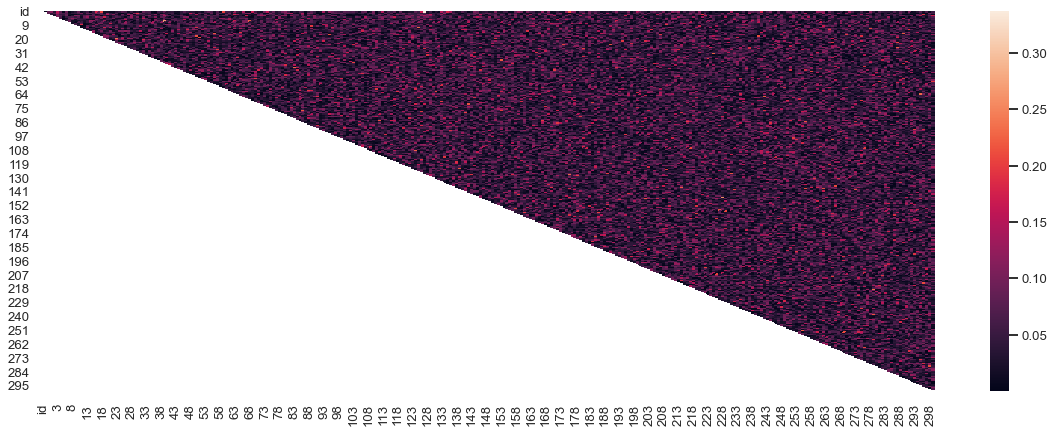

In [7]:
# Select upper triangle of correlation matrix
matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(matrix)
plt.show;

In [8]:
# Find index of feature columns with high correlation
to_drop = [column for column in matrix.columns if any(matrix[column] > 0.50)]
print('Columns to drop: ' , (len(to_drop)))

Columns to drop:  0


From the above correlation matrix we see that there are no highly correlated features in the dataset.  And even exploring correlation to target shows feature 33 with the highest correlation of only 0.37.

In [10]:

# fit on train set
fit = select_model.fit(X_train, y_train)

# transform train set
model_features = fit.transform(X_train)

NameError: name 'select_model' is not defined

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)

## 7. PCA

PCA (Principle Component Analysis) is a dimensionality reduction technique that projects the data into a lower dimensional space.
While there are many effective dimensionality reduction techniques, PCA is the only example we will explore here.
PCA can be useful in many situations, but especially in cases with excessive multicollinearity or explanation of predictors is not a priority.

In [ ]:
from sklearn.decomposition import PCA
# pca - keep 90% of variance
pca = PCA(0.90)

principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

In [ ]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr, principal_df, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, principal_df, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

In [ ]:
# pca keep 75% of variance
pca = PCA(0.75)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

In [ ]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr, principal_df, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, principal_df, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

In [ ]:
# checking which are the most important features
feature_importance = rfc.fit(principal_df, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

> Recursive feature selection appears to perform the best above.  We'll use our tuned hyperparameters from our [hyperparameter tuning kernel](https://www.kaggle.com/tboyle10/hyperparameter-tuning) and submit to the competition.

In [ ]:
# feature extraction
rfe = feature_selection.RFE(lr, n_features_to_select=100)

# fit on train set
fit = rfe.fit(X_train, y_train)

# transform train set
recursive_X_train = fit.transform(X_train)
recursive_X_test = fit.transform(X_test)

lr = LogisticRegression(C=1, class_weight={1:0.6, 0:0.4}, penalty='l1', solver='liblinear')
lr_scores = cross_val_score(lr, recursive_X_train, y_train, cv=5, scoring='roc_auc')
lr_scores.mean()

In [ ]:
predictions = lr.fit(recursive_X_train, y_train).predict_proba(recursive_X_test)

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = predictions
submission.to_csv('submission.csv', index=False)
submission.head()